## OULAD: Open University Learning Analytics Dataset

A dataset containing demographical information about students, their courses attended and final results each of their course.

### Agenda

a. More about dataset<br>
b. Schema involved<br>
c. EDA exercise on OULAD dataset<br>
d. Folder structuring<br>
e. Conclusion<br>

### a. More about dataset

This page introduces the anonymised Open University Learning Analytics Dataset (OULAD). It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).

### b. Schema Involved

<img src="../static/imgs/model.png">

A data frame with 32593 rows and 12 variables:

code_module
Name of course, for which student registered

code_presentation
Name of semester, for which student registered

id_student
Unique integer identifiing each student

gender
Students gender

region
UK region, in which student lives

highest_education
Highest education student achieved before taking course

imd_band
Index of Multiple Deprivation (see https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015) percentile, students with imd_band lower than 20 comes from the most deprived regions

age_band
Age band of student

num_of_prev_attempts
Number of student previous attempts on the selected course

studied_credits
Total credits student is studiing at the Open University during period of the course

disability
Student claims disability of any type, logical

final_result
Student final result in the course

Region values
East Anglian Region

Scotland

North Western Region

South East Region

West Midlands Region

Wales

North Region

South Region

Ireland

South West Region

East Midlands Region

Yorkshire Region

London Region

See https://en.wikipedia.org/wiki/Regions_of_England for explanation.

Highest education values
HE Qualification - awarded after one year full-time study at the university or higher education institution

A Level or Equivalent - secondary school leaving qualification

Lower Than A Level - did not completed secondary school

Post Graduate Qualification - equal to Master degree more or less

No Formal quals - no previous formal education

Final result values
Pass - passed the course

Withdrawn - whithdrawn the course before offical end

Fail - failed the course after taking final exam

Distinction - passed course with outstanding results

Source
https://analyse.kmi.open.ac.uk/open_dataset

### c. EDA exercise on OULAD dataset

In [3]:
#Data loading/transformation
import numpy as np
import pandas as pd

In [4]:
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
#function to display basic info for a given dataframe
def show_basic_info(df):
    print("========================================================================================================")
    print("HEAD:")
    print(df.head(3))
    print("--------------------------------------------------------------------------------------------------------")
    print("SHAPE:")
    print(df.shape)
    print("--------------------------------------------------------------------------------------------------------")
    print("INFO:")
    print(df.info())
    print("--------------------------------------------------------------------------------------------------------")
    print("DESCRIBE:")
    print(df.describe())
    print("--------------------------------------------------------------------------------------------------------")
    print("========================================================================================================")

    

In [34]:
#assessments_df = pd.read_csv('../data/raw/assessments.csv')
assessments_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/assessments.csv')
show_basic_info(assessments_df)

HEAD:
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
--------------------------------------------------------------------------------------------------------
SHAPE:
(206, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 195 non-null float64
weight               206 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB
None
--------------------------------

In [35]:
#courses_df = pd.read_csv('../data/raw/courses.csv')
courses_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/courses.csv')
show_basic_info(courses_df)

HEAD:
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
--------------------------------------------------------------------------------------------------------
SHAPE:
(22, 3)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
code_module                   22 non-null object
code_presentation             22 non-null object
module_presentation_length    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
       module_presentation_length
count                   22.000000
mean                   255.54545

In [36]:
#studentAssessment_df = pd.read_csv('../data/raw/studentAssessment.csv')
studentAssessment_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentAssessment.csv')
show_basic_info(studentAssessment_df)

HEAD:
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
--------------------------------------------------------------------------------------------------------
SHAPE:
(173912, 5)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173739 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None
--------------------------------------------------------------------------------------------------------
DESCRIBE:
       id_assessment    i

In [37]:
#studentInfo_df = pd.read_csv('../data/raw/studentInfo.csv')
studentInfo_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentInfo.csv')
show_basic_info(studentInfo_df)

HEAD:
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  
2               60          Y    Withdrawn  
--------------------------------------------------------------------------------------------------------
SHAPE:
(32593, 12)
--------------------------------------------------------------------------------------------------------
INFO:
<

In [38]:
#studentRegistration_df = pd.read_csv('../data/raw/studentRegistration.csv')
studentRegistration_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/studentRegistration.csv')
show_basic_info(studentRegistration_df)

HEAD:
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
--------------------------------------------------------------------------------------------------------
SHAPE:
(32593, 5)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32548 non-null float64
date_unregistration    10072 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB

In [39]:
#vle_df = pd.read_csv('../data/raw/vle.csv')
vle_df = pd.read_csv('https://raw.githubusercontent.com/vjcalling/OULAD-data-analysis-EDA-/master/data/raw/vle.csv')
show_basic_info(vle_df)

HEAD:
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
--------------------------------------------------------------------------------------------------------
SHAPE:
(6364, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
id_site              6364 non-null int64
code_module          6364 non-null object
code_presentation    6364 non-null object
activity_type        6364 non-null object
week_from            1121 non-null float64
week_to              1121 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None
---------------------------------

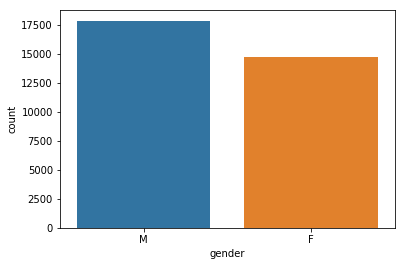

In [40]:
#Checking gender distribution
sns.countplot(studentInfo_df.gender);    #this shows that courses data is almost equally distributed on gender

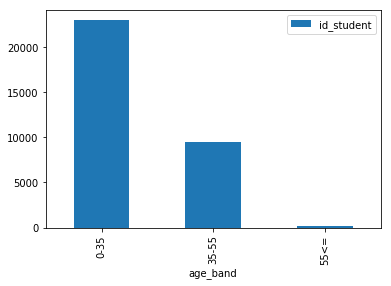

In [22]:
#Now let's try the same on age
studentInfo_df[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar();    #this shows majority of students fall in age band of 0-35

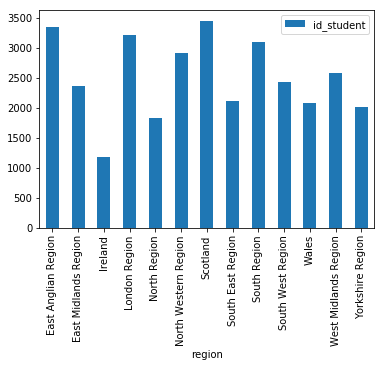

In [24]:
#Now let's try the same on region
studentInfo_df[['id_student', 'region']].groupby(by='region').count().plot.bar();

In [25]:
# What if we want to do a multi dimensional visualization?
# Pandas provide this using crosstab
# crosstab: Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors 
# unless an array of values and an aggregation function are passed.

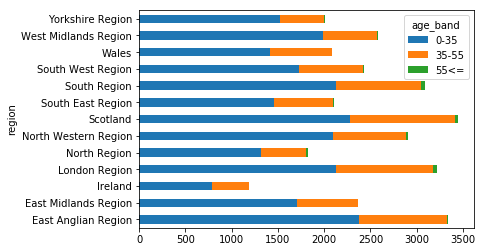

In [27]:
pd.crosstab(studentInfo_df.region, studentInfo_df.age_band).plot.barh(stacked = True);

In [28]:
# How to visualize continous variables, ouliers?
# Python provides us boxplot for this.
# boxplot:  The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the 
# distribution of data based on the five number summary: 
# minimum, first quartile, median, third quartile, and maximum.